In [1]:
import pandas as pd
import numpy as np
import re

In [3]:
df2 = pd.read_csv('final_data_19612.csv', sep='\t', encoding='UTF-8')
df = df2.loc[df2['대상 선정']=='O',:]

In [4]:
df.columns

Index(['std_clm_type_cd', 'ro_y', 'clm_jgmt_dt', 'ceq_caus_cd', 'ceq_psit_cd',
       'ceq_psit_nm', 'trim_plnt_cd', 'prj_vehl_cd', 'mdl_cd', 'part_sys_cd',
       'repn_part_cd', 'clm_prtl_sbc', '대상 선정', '구분', '책임구', '원인'],
      dtype='object')

In [5]:
df.head(2)

std_clm_type_cd  ro_y  clm_jgmt_dt ceq_caus_cd ceq_psit_cd    ceq_psit_nm  \
12               W  2017     20171010         ZZ7         B11  조립 문제_미장착/오장착   
14               W  2018     20180725         ZZ7         B11  조립 문제_미장착/오장착   

   trim_plnt_cd prj_vehl_cd mdl_cd part_sys_cd repn_part_cd  \
12         KV11          CK     J5          AC        91500   
14         KV11          YP     A9          EE        28291   

                                         clm_prtl_sbc 대상 선정       구분   책임구  \
12  [C] 현상-1. 현상  가. 인도후 오디오 작동시 주파수 및 노이즈 발생으로 고객...     O  기능(커넥터)  생산공장   
14  [C] 1. 현상  주행중 엔진경고등 점등2. 점검내용 및 원인  스캔점검결과 P2...     O  기능(커넥터)  생산공장   

     원인  
12  미결선  
14   기타

In [6]:
df.shape

(4331, 16)

In [7]:
df = df.fillna('N')

userdic = pd.read_csv('userdic_1906122.csv', sep='\t', encoding='UTF-8')
userdic['User Dic.'][0:1]
userdic = userdic.rename(columns = {'User Dic.':'standard'})
userdic = userdic.rename(columns = {'동의어':'missprint'})
userdic = userdic.rename(columns = {'불용단어':'stops'})
userdic_list = userdic.rename(columns = {'User Dic.':'standard'})
userdic_list = userdic.rename(columns = {'동의어':'missprint'})
userdic_list = userdic.rename(columns = {'불용단어':'stops'})
userdic_list = userdic_list.fillna('')
userdic = userdic.fillna('')
replace_word = userdic.iloc[:,1:3]
replace_word = replace_word[replace_word.missprint != '']

In [8]:
replaceword_list =  replace_word['standard'].tolist()
missword_list = replace_word['missprint'].tolist()
print(len(replaceword_list))
print(len(missword_list))

757
757


In [9]:
for i in range(len(replaceword_list)):
    df['clm_prtl_sbc'] = df['clm_prtl_sbc'].replace(missword_list[i],replaceword_list[i],regex=True)
#regex=True 설정을 주면 조사가 붙어있던 말던 단어를 다 바꿔준다.

In [10]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['현상', '[C]','현상및점검','현    상','현 상','점검점검','점검내용','조치내용','점검점검내용','현상및조치','C','원인',
             '점검/원인','사진첨부','(사진첨부)','사진참조','점검및원인','동영상참조','동영상','대리점','고객','고객에게','상기',
             '차량','상기차량은','자동차','당차량은','당차량','당','차량은','점검및조치내용','F/LH','F/RH','L/H','R/H','L/H리어',
             'R/H리어','LH/RH','LH','RH','(RH)','(LH)','R/LH','R/RH','리어RH','리어LH','LH쪽','RH쪽','Rr','RR','FRT','Frt',
             'frt','rr','C-10000','C-100','(좌)','(우)','A/S','결과','공임','광주','넥쏘','니로','레이','렌트','리무진',
             '모닝','모하비','벨로스터','사진','상기','서비스','소하','스타렉스','스팅어','스포티지','신차','싼타페','써비스',
             '쏘나타','쏘렌토','쏘울','아반떼','아산','아이오닉','언덕','엑센트','열','울산','임시 넘버','임시 번호','입고',
             '저머검내용','점검결과','조치결과','주차장','증상','지하','철도','첨부','첨부파일','청구','출고','카 마스터','카니발',
             '카렌스','코나','클레임','투싼','팰리세이드','하이리무진','하이브리드','현     상','현    상','현   상','현  상',
             '현 상','현산','화성','그랜저','새벽','새차','야간','주간','그랜져','주재원','아침','밤, 심야','낮,낫','주제원']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words) #stops에 안 걸리는 나머지 것들 이어붙이기

In [11]:
#%time 
df['clm_prtl_sbc'] = df['clm_prtl_sbc'].apply(remove_stopwords)

In [12]:
x = df['clm_prtl_sbc']
y = df['구분']

In [13]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np


max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x)                   # X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(x) # 단어를 숫자인덱스로 변환하여 저장

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았어요.' % len(word_index))

Using TensorFlow backend.


21905개의 고유한 토큰을 찾았어요.


In [37]:
sequences[:10]

[[3,
  1,
  118,
  2188,
  422,
  28,
  3838,
  6,
  2,
  40,
  13,
  6302,
  6,
  118,
  5,
  3839,
  3840,
  6303,
  6304,
  2793,
  3840,
  904,
  1157,
  461,
  26,
  347,
  6305,
  703,
  196,
  74,
  422,
  6,
  515,
  26,
  9,
  609,
  194,
  172,
  74,
  2794,
  905,
  26,
  1054,
  78,
  13,
  228,
  3841,
  118,
  2794,
  905,
  6306,
  336,
  2793,
  26,
  9,
  11],
 [1,
  7,
  97,
  146,
  6,
  1606,
  583,
  1607,
  63,
  3842,
  6307,
  8,
  1860,
  245,
  6,
  704,
  16,
  21,
  9,
  6308,
  1272,
  226,
  1608,
  850],
 [6309,
  6310,
  2795,
  2796,
  584,
  59,
  6311,
  6312,
  6313,
  6314,
  6315,
  2796,
  6316,
  65,
  516,
  6317,
  423,
  3843,
  6318,
  283],
 [6319, 8, 177, 67, 390, 213],
 [982, 11, 983, 982, 67, 133, 13, 283],
 [432, 6320, 19, 6321, 125, 226, 1055],
 [1,
  6322,
  151,
  27,
  6323,
  11,
  13,
  6324,
  24,
  6325,
  1056,
  39,
  6326,
  73,
  39,
  2797,
  9],
 [19,
  3844,
  2189,
  11,
  446,
  3845,
  6327,
  6328,
  74,
  81,
  1609,


138


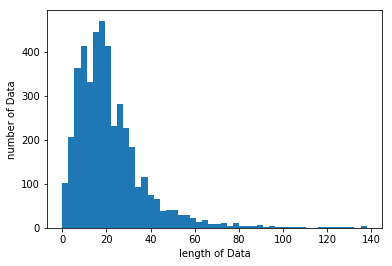

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

x = sequences
print(max(len(l) for l in x))
plt.hist([len(s) for s in x], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [15]:
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(y)                     # y의 각 행에 토큰화를 수행
sequences2 = tokenizer2.texts_to_sequences(y)  # 단어를 숫자인덱스로 변환하여 저장

word_index2 = tokenizer2.word_index
print('%s개의 고유한 토큰을 찾았어요.' % len(word_index2))

4개의 고유한 토큰을 찾았어요.


2


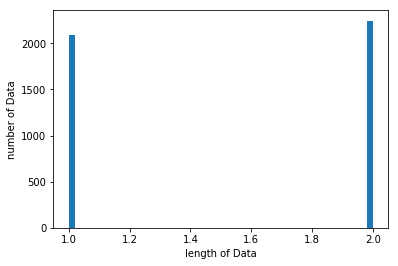

In [16]:
y = sequences2
print(max(len(l) for l in y))
plt.hist([len(s) for s in y], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [19]:
maxlen = 138
training_samples = 3898
test_samples = 10000

In [20]:
from keras.preprocessing import sequence
data_x = pad_sequences(sequences, maxlen=maxlen)
data_y = pad_sequences(sequences2)

In [38]:
data_x

array([[   0,    0,    0, ...,   22,  223,  142],
       [   0,    0,    0, ...,   38,    8,    4],
       [   0,    0,    0, ...,    6, 2359,   44],
       ...,
       [   0,    0,    0, ...,   18, 3130,    4],
       [   0,    0,    0, ..., 1124, 1555, 1327],
       [   0,    0,    0, ...,  736,   59,  208]])

In [39]:
data_y

array([[0, 3],
       [0, 3],
       [0, 3],
       ...,
       [1, 2],
       [0, 3],
       [0, 4]])

In [21]:
# labels = np.asarray(y)
print('x 데이터 텐서 크기:', data_x.shape)
print('y 데이터 텐서 크기:', data_y.shape)

x 데이터 텐서 크기: (4331, 138)
y 데이터 텐서 크기: (4331, 2)


In [22]:
indices = np.arange(data_x.shape[0])
indices2 = np.arange(data_y.shape[0])
np.random.shuffle(indices)
np.random.shuffle(indices2)
data_x = data_x[indices]
data_y = data_y[indices2]

In [23]:
x_train = data_x[:training_samples]
y_train = data_y[:training_samples]
x_test = data_x[training_samples: training_samples + test_samples]
y_test = data_y[training_samples: training_samples + test_samples]

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3898, 138)
(3898, 2)
(433, 138)
(433, 2)


In [25]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[   0    0    0 ...   22  223  142]
 [   0    0    0 ...   38    8    4]
 [   0    0    0 ...    6 2359   44]
 ...
 [   0    0    0 ... 1780 1092   14]
 [   0    0    0 ...   75  258 2407]
 [   0    0    0 ...    0    0    1]]
[[0 3]
 [0 3]
 [0 3]
 ...
 [1 2]
 [1 2]
 [0 3]]
[[   0    0    0 ...  531  307 2002]
 [   0    0    0 ...   29    4  549]
 [   0    0    0 ... 3736 2061  447]
 ...
 [   0    0    0 ...   18 3130    4]
 [   0    0    0 ... 1124 1555 1327]
 [   0    0    0 ...  736   59  208]]
[[1 2]
 [1 2]
 [1 2]
 [0 4]
 [1 2]
 [1 2]
 [0 4]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [0 3]
 [1 2]
 [0 3]
 [1 2]
 [0 4]
 [0 4]
 [0 4]
 [0 3]
 [1 2]
 [0 3]
 [1 2]
 [1 2]
 [0 3]
 [1 2]
 [1 2]
 [0 3]
 [1 2]
 [0 3]
 [1 2]
 [1 2]
 [1 2]
 [0 3]
 [1 2]
 [1 2]
 [0 3]
 [1 2]
 [1 2]
 [0 3]
 [0 3]
 [0 4]
 [1 2]
 [1 2]
 [0 3]
 [1 2]
 [0 3]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [0 3]
 [1 2]
 [0 3]
 [0 3]
 [1 2]
 [0 4]
 [1 2]
 [0 3]
 [0 3]
 [0 3]
 [0 3]
 [1 2]
 [0 3]
 [1 2]
 [0 3]
 [0 4]
 [0 3]
 [0 3]
 [0 4]

In [26]:
# maxlen = 163
# max_features = 20000
# embedding_dim = 100
# embedding_matrix = np.zeros((max_features,embedding_dim))
# for word,i in word_index.items():
#     if i < max_features:
#         embedding_vector = embedding_index.get(word)
#         if embedding_vector is not None:
#             embedding_matrix[i] = embedding_vector

In [29]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,Flatten,SimpleRNN

max_features = 10000
# maxlen = 163
# embedding_dim = 163

model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(2,activation='sigmoid'))

# model.add(Embedding(max_features,embedding_dim,input_length=maxlen))
# model.add(Flatten())
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 322,146
Trainable params: 322,146
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 3118 samples, validate on 780 samples
Epoch 1/10
3118/3118 [==============================] - 3s 872us/step - loss: -1.0713 - acc: 0.2436 - val_loss: -2.5504 - val_acc: 0.2776
Epoch 2/10
3118/3118 [==============================] - 2s 625us/step - loss: -3.4908 - acc: 0.2470 - val_loss: -4.4023 - val_acc: 0.2583
Epoch 3/10
3118/3118 [==============================] - 2s 691us/step - loss: -5.1907 - acc: 0.2434 - val_loss: -5.9453 - val_acc: 0.2417
Epoch 4/10
3118/3118 [==============================] - 3s 886us/step - loss: -6.5972 - acc: 0.2410 - val_loss: -7.2001 - val_acc: 0.2417
Epoch 5/10
3118/3118 [==============================] - 2s 594us/step - loss: -7.7488 - acc: 0.2481 - val_loss: -8.2290 - val_acc: 0.2583
Epoch 6/10
3118/3118 [==============================] - 2s 693us/step - loss: -8.6646 - acc: 0.2583 - val_loss: -9.0534 - val_acc: 0.2583
Epoch 7/10
3118/3118 [==============================] - 2s 776us/step - loss:

In [31]:
import matplotlib.pyplot as plt

In [32]:
print(history.history['acc'])
print(history.history['val_acc'])
print(history.history['loss'])
print(history.history['val_loss'])

[0.2435856318534988, 0.24695317508357698, 0.24342527264888048, 0.2410198846178379, 0.24807568950634726, 0.2583386787166192, 0.2580179600397542, 0.25898011549685995, 0.25898011542039473, 0.2554522128805585]
[0.2775641025641026, 0.2583333331805009, 0.24166666659025046, 0.24166666659025046, 0.2583333331805009, 0.2583333331805009, 0.2583333331805009, 0.2583333331805009, 0.2583333331805009, 0.2583333331805009]
[-1.071306224508573, -3.4908279669139537, -5.1907055706760685, -6.597240927282092, -7.748848146165771, -8.664551263898515, -9.427616844275121, -10.127528114147566, -10.81386591303876, -11.506958181541497]
[-2.550370420553745, -4.402294792273106, -5.945310455713517, -7.200093056605413, -8.229048320574638, -9.053438631693522, -9.768113062931942, -10.455773299779647, -11.13958673232641, -11.804753117683607]


<Figure size 432x288 with 0 Axes>

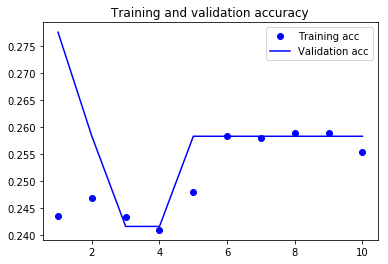

<Figure size 432x288 with 0 Axes>

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

<Figure size 432x288 with 0 Axes>

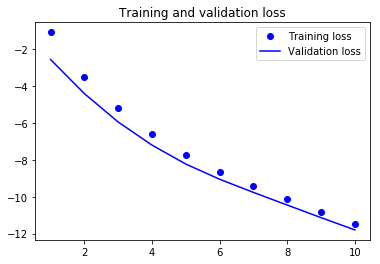

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

In [35]:
# model.load_weights('pre_trained_model.h5')
model.evaluate(x_test, y_test)

433/433 [==============================] - 0s 216us/step


[-11.895788734559375, 0.26096997700855307]